In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
df = pd.read_excel("Data Covid.xlsx")
df.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-02,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-03,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,0,1.0,0.0,0.0,2.0,3.0,2.0
3,2020-03-04,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-05,0.0,0.0,2.0,2.0,3.0,0.0,0.0,4.0,7.0,4.0,0.0,0.0,0.0,0,2.0,0.0,0.0,2.0,4.0,2.0


In [ ]:
df.describe()

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
count,490.000000,4.900000e+02,490.000000,4.900000e+02,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,491.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,19726.895918,5.887866e+05,73705.969388,6.822195e+05,3020.471429,155285.720408,6740.481633,3422.524490,168469.197959,10163.006122,122.504082,3908.463265,574.851020,4596.437882,17.522449,977.857143,112.124490,56.004082,1163.489796,168.128571
std,18180.976600,6.217873e+05,54925.818019,6.850139e+05,2615.344471,160500.635447,7072.126630,3205.301552,167972.316788,9930.252645,93.694217,3176.971454,2188.948749,4262.488248,14.635884,1007.147589,678.901006,363.741059,1426.630052,863.567205
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5926.000000,0.000000,0.000000,0.000000,-3345.000000,-1271.000000,0.000000,-2301.000000
25%,2947.250000,2.586300e+04,29365.750000,5.817600e+04,644.500000,6727.750000,2962.250000,1849.750000,11530.750000,4474.500000,53.000000,864.500000,-161.500000,1287.500000,6.000000,153.500000,-82.750000,-64.500000,200.750000,-71.500000
50%,13906.000000,3.398715e+05,63209.000000,4.114360e+05,2264.000000,94626.500000,4963.000000,2779.500000,105901.000000,7688.000000,106.000000,3805.500000,262.500000,4106.000000,15.000000,835.500000,31.000000,20.000000,855.000000,53.500000
75%,36670.250000,1.167653e+06,109828.250000,1.352132e+06,5601.750000,330393.500000,8691.750000,4223.250000,343448.750000,12685.000000,173.000000,5972.000000,765.250000,6159.500000,22.000000,1244.500000,197.500000,125.750000,1378.500000,221.250000
max,60027.000000,1.915147e+06,281677.000000,2.256851e+06,8577.000000,479150.000000,54941.000000,27442.000000,570110.000000,82383.000000,539.000000,13282.000000,14458.000000,27913.000000,79.000000,5757.000000,4635.000000,2062.000000,9702.000000,6503.000000


In [ ]:
df.mode(axis=0, numeric_only=True)

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,0.0,0.0,2.0,2.0,3.0,0.0,0.0,4.0,7.0,4.0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_small = df[['Meninggal (Indonesia)','Meninggal (Jakarta)', 'Self-Isolation (Jakarta)'
                ,'Dirawat (Jakarta)', 'Meninggal Harian (Indonesia)'
                , 'Sembuh Harian (Indonesia)','Dirawat Harian (Indonesia)','Positif Harian (Indonesia)',
               'Meninggal Harian (Jakarta)','Sembuh Harian (Jakarta)','Self-Isolation Harian (Jakarta)','Dirawat Harian (Jakarta)',
               'Positif Harian (Jakarta)','Positif Aktif Harian (Jakarta)']]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


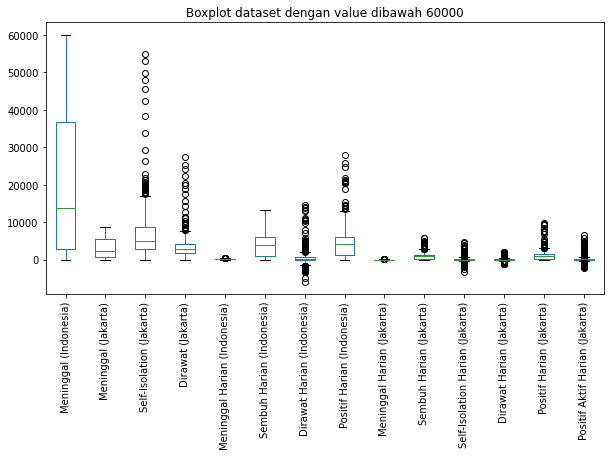

In [ ]:
df_small.boxplot(figsize = (10,5), rot = 90, grid = False)
plt.title("Boxplot dataset dengan value dibawah 60000")
plt.show()

In [ ]:
df_large = df[['Positif Aktif (Jakarta)','Dirawat (Indonesia)','Sembuh (Indonesia)',
               'Positif (Indonesia)','Sembuh (Jakarta)','Positif (Jakarta)']]

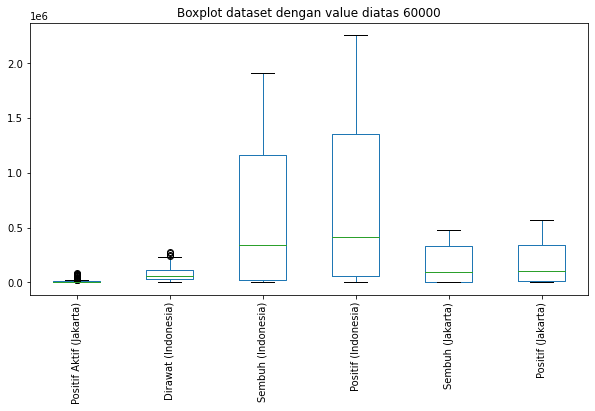

In [ ]:
df_large.boxplot(figsize = (10,5), rot = 90, grid = False)
plt.title("Boxplot dataset dengan value diatas 60000")
plt.show()

In [ ]:
df = df.drop(columns="Tanggal")
df.head()

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,0,1.0,0.0,0.0,2.0,3.0,2.0
3,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,3.0,2.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,2.0,3.0,0.0,0.0,4.0,7.0,4.0,0.0,0.0,0.0,0,2.0,0.0,0.0,2.0,4.0,2.0


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Meninggal (Indonesia)               0
Sembuh (Indonesia)                  0
Dirawat (Indonesia)                 4
Positif (Indonesia)                 0
Meninggal (Jakarta)                 0
Sembuh (Jakarta)                    0
Self-Isolation (Jakarta)           34
Dirawat (Jakarta)                  25
Positif (Jakarta)                   0
Positif Aktif (Jakarta)            18
Meninggal Harian (Indonesia)       14
Sembuh Harian (Indonesia)           0
Dirawat Harian (Indonesia)         75
Positif Harian (Indonesia)         19
Meninggal Harian (Jakarta)         23
Sembuh Harian (Jakarta)            28
Self-Isolation Harian (Jakarta)    68
Dirawat Harian (Jakarta)           66
Positif Harian (Jakarta)           38
Positif Aktif Harian (Jakarta)     83
dtype: int64

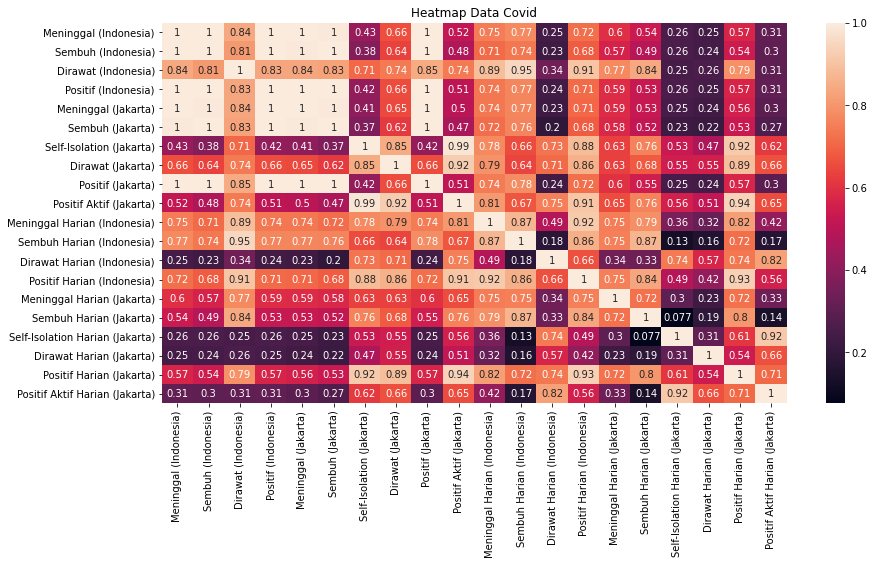

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(data=df.corr(), annot=True)
plt.title("Heatmap Data Covid")
plt.show()

In [ ]:
df.corr(method='pearson')

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
Meninggal (Indonesia),1.000000,0.996851,0.838105,0.998584,0.998938,0.995215,0.428347,0.658438,0.997099,0.517592,0.748266,0.773818,0.245172,0.719226,0.596100,0.536979,0.261148,0.245191,0.571985,0.308580
Sembuh (Indonesia),0.996851,1.000000,0.806174,0.998798,0.996156,0.997178,0.383611,0.637688,0.996652,0.479034,0.714072,0.737591,0.229742,0.683544,0.566505,0.494225,0.257232,0.242783,0.539023,0.304487
Dirawat (Indonesia),0.838105,0.806174,1.000000,0.834190,0.835773,0.827421,0.706275,0.740346,0.847492,0.741965,0.889799,0.952373,0.342939,0.905658,0.772792,0.844316,0.250222,0.258931,0.789053,0.305778
Positif (Indonesia),0.998584,0.998798,0.834190,1.000000,0.997738,0.997897,0.416203,0.655668,0.999079,0.508049,0.739369,0.766413,0.242542,0.712159,0.592002,0.530559,0.260484,0.247643,0.567720,0.309091
Meninggal (Jakarta),0.998938,0.996156,0.835773,0.997738,1.000000,0.996288,0.411883,0.646885,0.997227,0.502137,0.737916,0.768782,0.228741,0.706805,0.588435,0.527872,0.251147,0.235789,0.558322,0.296758
Sembuh (Jakarta),0.995215,0.997178,0.827421,0.997897,0.996288,1.000000,0.374105,0.619125,0.998596,0.466272,0.717378,0.762062,0.196186,0.684623,0.578855,0.517036,0.225088,0.218314,0.533717,0.268911
Self-Isolation (Jakarta),0.428347,0.383611,0.706275,0.416203,0.411883,0.374105,1.000000,0.845255,0.422110,0.985013,0.775628,0.656717,0.731204,0.882171,0.631382,0.760732,0.534410,0.472059,0.918173,0.618966
Dirawat (Jakarta),0.658438,0.637688,0.740346,0.655668,0.646885,0.619125,0.845255,1.000000,0.656327,0.924755,0.792006,0.640229,0.714661,0.861743,0.633207,0.681799,0.546227,0.553788,0.888956,0.662681
Positif (Jakarta),0.997099,0.996652,0.847492,0.999079,0.997227,0.998596,0.422110,0.656327,1.000000,0.512468,0.744727,0.780001,0.235444,0.718761,0.600935,0.547295,0.251910,0.242717,0.574290,0.300275
Positif Aktif (Jakarta),0.517592,0.479034,0.741965,0.508049,0.502137,0.466272,0.985013,0.924755,0.512468,1.000000,0.808031,0.674354,0.751428,0.906419,0.654045,0.761850,0.556908,0.514944,0.940843,0.654716


In [ ]:
sns.regplot(x='Meninggal (Jakarta)',y='Meninggal (Indonesia)', data=df)
plt.title("Regresi antara Meninggal (Jakarta) dan Meninggal (Indonesia)")
plt.show()

In [ ]:
df.tail()

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
486,58491.0,1880413.0,239368.0,2178272.0,8486.0,464943.0,47829.0,22210.0,543468.0,70039.0,467.0,10807.0,10533.0,21807,60.0,3504.0,2325.0,1791.0,7680.0,4116.0
487,58995.0,1890287.0,253826.0,2203108.0,8528.0,468461.0,49836.0,24184.0,551009.0,74020.0,504.0,9874.0,14458.0,24836,42.0,3518.0,2007.0,1974.0,7541.0,3981.0
488,59534.0,1901865.0,267539.0,2228938.0,8547.0,473467.0,53014.0,25380.0,560408.0,78394.0,539.0,11578.0,13713.0,25830,19.0,5006.0,3178.0,1196.0,9399.0,4374.0
489,60027.0,1915147.0,281677.0,2256851.0,8577.0,479150.0,54941.0,27442.0,570110.0,82383.0,493.0,13282.0,14138.0,27913,30.0,5683.0,1927.0,2062.0,9702.0,3989.0
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop row ke 490
df = df.drop([490])
df.tail()

,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
485,58024.0,1869606.0,228835.0,2156465.0,8426.0,461439.0,45504.0,20419.0,535788.0,65923.0,463.0,9645.0,10359.0,20467,78.0,3504.0,3252.0,545.0,7379.0,3797.0
486,58491.0,1880413.0,239368.0,2178272.0,8486.0,464943.0,47829.0,22210.0,543468.0,70039.0,467.0,10807.0,10533.0,21807,60.0,3504.0,2325.0,1791.0,7680.0,4116.0
487,58995.0,1890287.0,253826.0,2203108.0,8528.0,468461.0,49836.0,24184.0,551009.0,74020.0,504.0,9874.0,14458.0,24836,42.0,3518.0,2007.0,1974.0,7541.0,3981.0
488,59534.0,1901865.0,267539.0,2228938.0,8547.0,473467.0,53014.0,25380.0,560408.0,78394.0,539.0,11578.0,13713.0,25830,19.0,5006.0,3178.0,1196.0,9399.0,4374.0
489,60027.0,1915147.0,281677.0,2256851.0,8577.0,479150.0,54941.0,27442.0,570110.0,82383.0,493.0,13282.0,14138.0,27913,30.0,5683.0,1927.0,2062.0,9702.0,3989.0


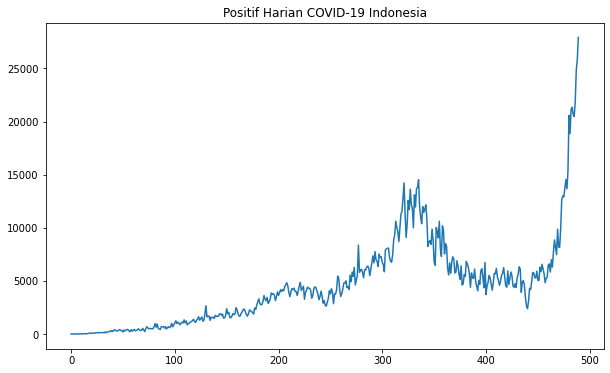

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df[['Positif Harian (Indonesia)']])
plt.title("Positif Harian COVID-19 Indonesia")
plt.show()

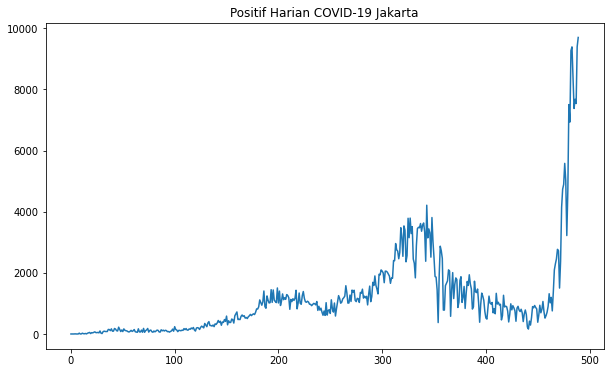

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df[['Positif Harian (Jakarta)']])
plt.title("Positif Harian COVID-19 Jakarta")
plt.show()